In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [ ]:
df_train = pd.read_csv('laptops_train.csv')
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [ ]:
df_test = pd.read_csv('laptops_test.csv')
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0


# Data Preprocessing Part 1

In [ ]:
df_train['Weight'] = df_train['Weight'].str.strip('kg')
df_train['Screen Size'] = df_train['Screen Size'].str.strip('"')
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,7993374.48
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,16037611.20


In [ ]:
df_train.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                  object
Screen                       object
CPU                          object
RAM                          object
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                       object
Price                       float64
dtype: object

In [ ]:
df_train['Weight'] = df_train['Weight'].astype(float, errors='raise')
df_train['Screen Size'] = df_train['Screen Size'].astype(float, errors='raise')

In [ ]:
df_train.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                 float64
Screen                       object
CPU                          object
RAM                          object
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                      float64
Price                       float64
dtype: object

In [ ]:
def fetch_processor(text):
    if 'Intel Core i5' in text:
        return 'Intel Core i5'
    elif 'Intel Core i7' in text:
        return 'Intel Core i7'
    elif 'Intel Core i3' in text:
        return 'Intel Core i3'
    elif text.startswith('Intel'):
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [ ]:
df_train['CPU brand'] = df_train['CPU'].apply(fetch_processor)

<AxesSubplot:>

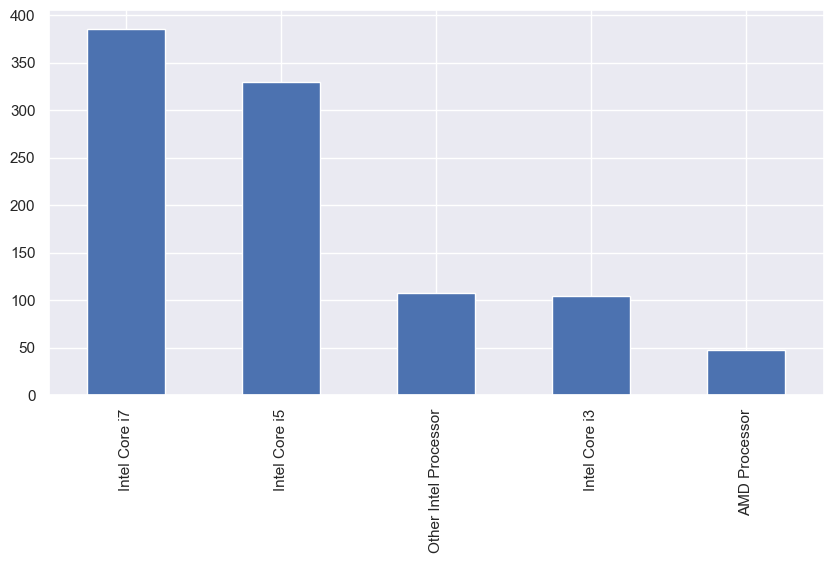

In [ ]:
plt.figure(figsize=(10,5))
df_train['CPU brand'].value_counts().plot(kind='bar')

In [ ]:
def gpu_type(text):
    if 'Intel' in text:
        return 'Intel'
    elif 'AMD' in text:
        return 'AMD'
    elif 'Nvidia' in text:
        return 'Nvidia'
    else:
        return 'Other GPU'

In [ ]:
df_train['GPU brand'] = df_train['GPU'].apply(gpu_type)

<AxesSubplot:>

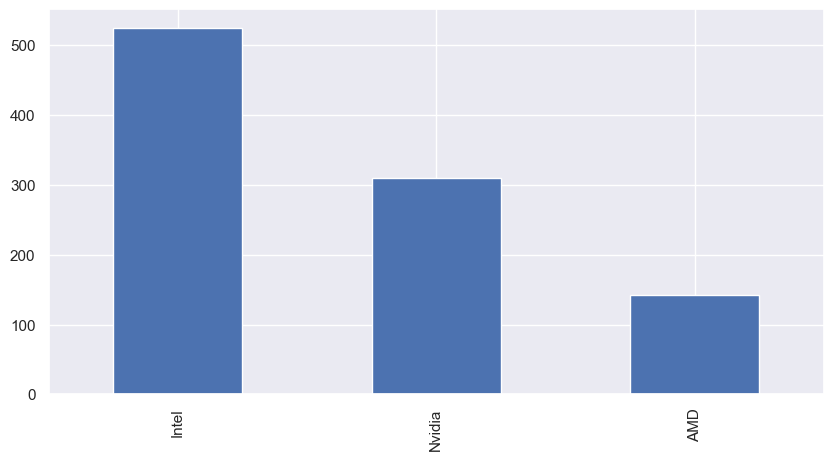

In [ ]:
plt.figure(figsize=(10,5))
df_train['GPU brand'].value_counts().plot(kind='bar')

In [ ]:
df_train['Operating System'] = df_train['Operating System'].replace('Mac OS', 'macOS')

In [ ]:
df_train['Screen Quality'] = df_train['Screen'].str.slice(-9)

<AxesSubplot:>

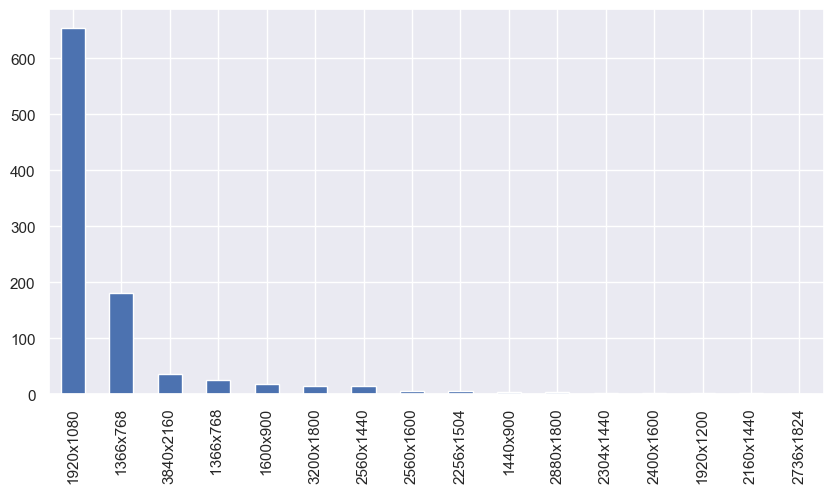

In [ ]:
plt.figure(figsize=(10,5))
df_train['Screen Quality'].value_counts().plot(kind='bar')

In [ ]:
def fetch_storage(text):
    if '128GB SSD' in text:
        return '128GB SSD'
    elif '256GB SSD' in text:
        return '256GB SSD'
    elif '512GB SSD' in text:
        return '512GB SSD'
    elif '500GB HDD' in text:
        return '500GB HDD'
    elif '1TB HDD' in text:
        return '1TB HDD'
    elif 'Flash Storage' in text:
        return 'Flash Storage'
    else:
        return 'Mixed Storage'

In [ ]:
df_train['Storage Type'] = df_train[' Storage'].apply(fetch_storage)

<AxesSubplot:>

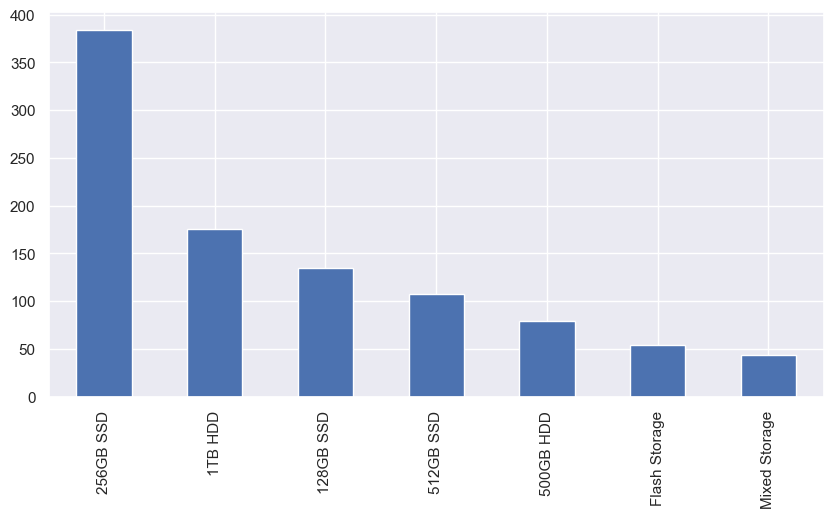

In [ ]:
plt.figure(figsize=(10,5))
df_train['Storage Type'].value_counts().plot(kind='bar')

# Exploratory Data Analysis

In [ ]:
df_train.select_dtypes(include='object').nunique()

Manufacturer                 19
Model Name                  488
Category                      6
Screen                       38
CPU                         106
RAM                           8
 Storage                     36
GPU                          98
Operating System              6
Operating System Version      4
CPU brand                     5
GPU brand                     3
Screen Quality               16
Storage Type                  7
dtype: int64

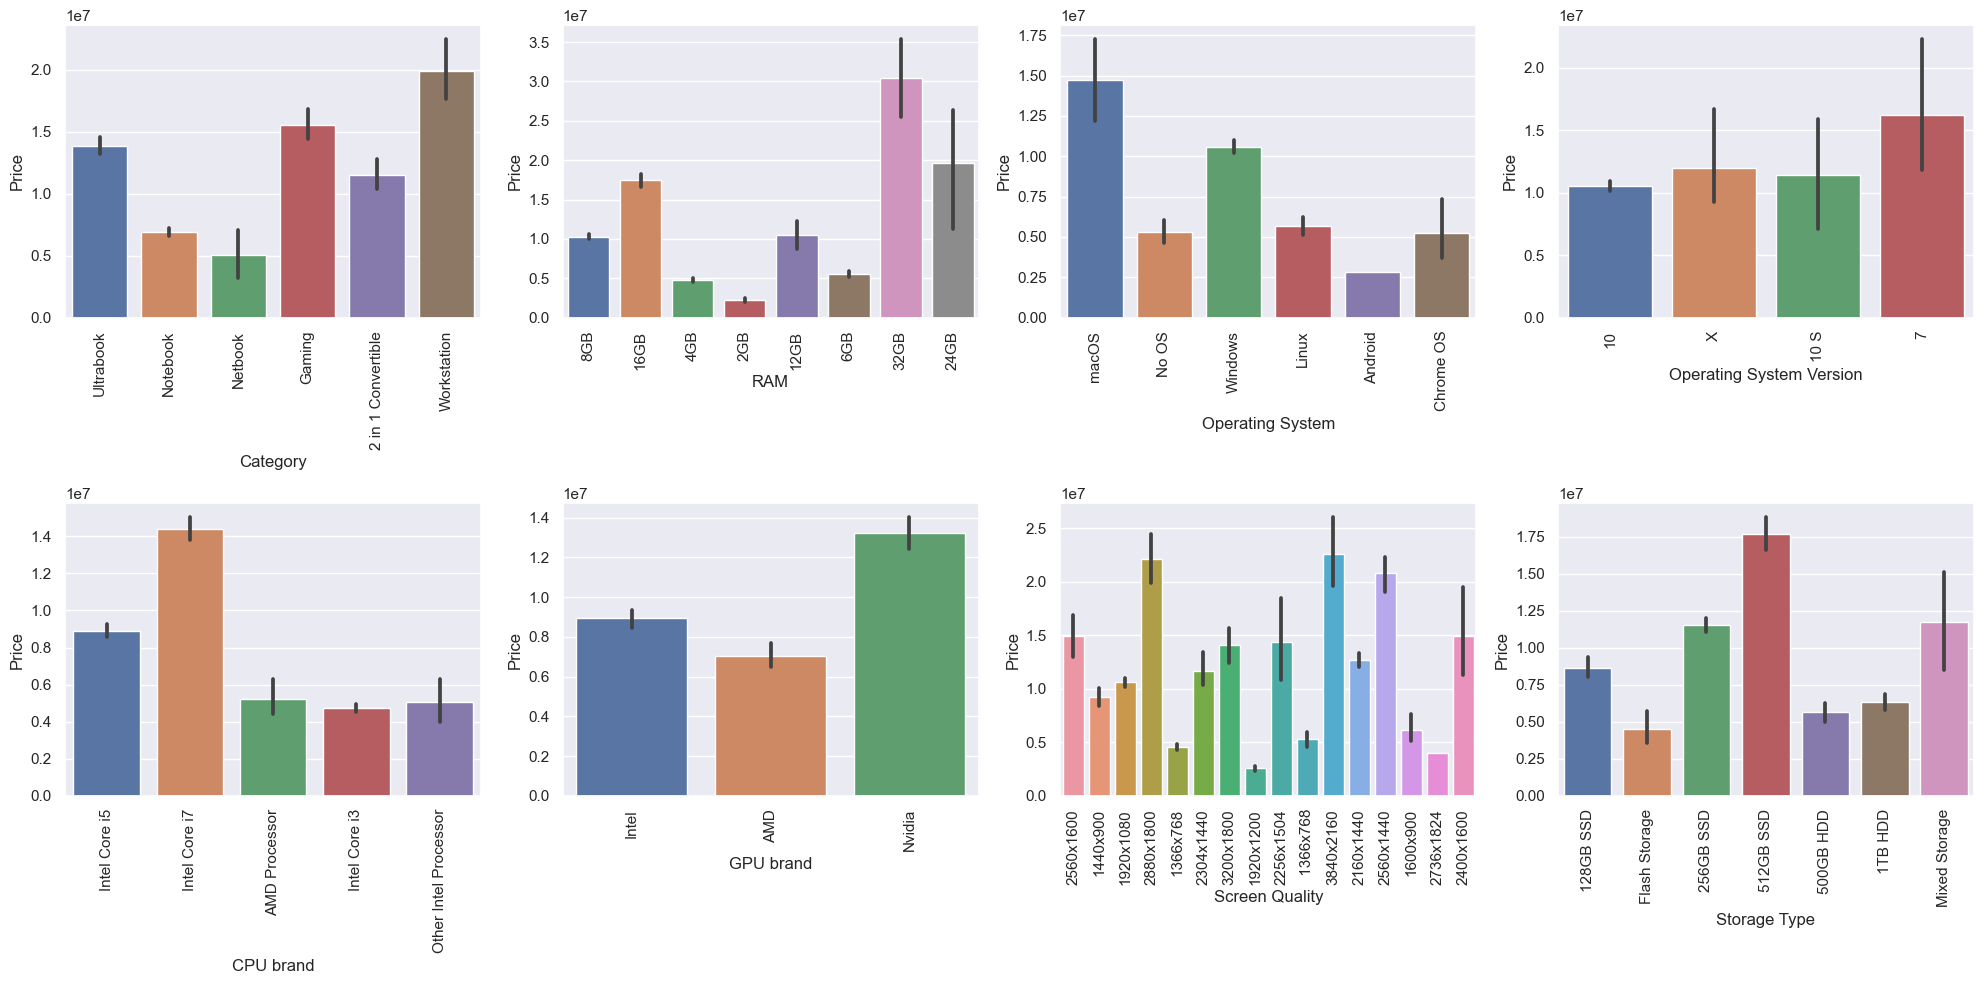

In [ ]:
# list of categorical variables to plot
cat_vars = ['Category', 'RAM', 'Operating System', 'Operating System Version', 'CPU brand', 'GPU brand', 'Screen Quality', 'Storage Type']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df_train, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

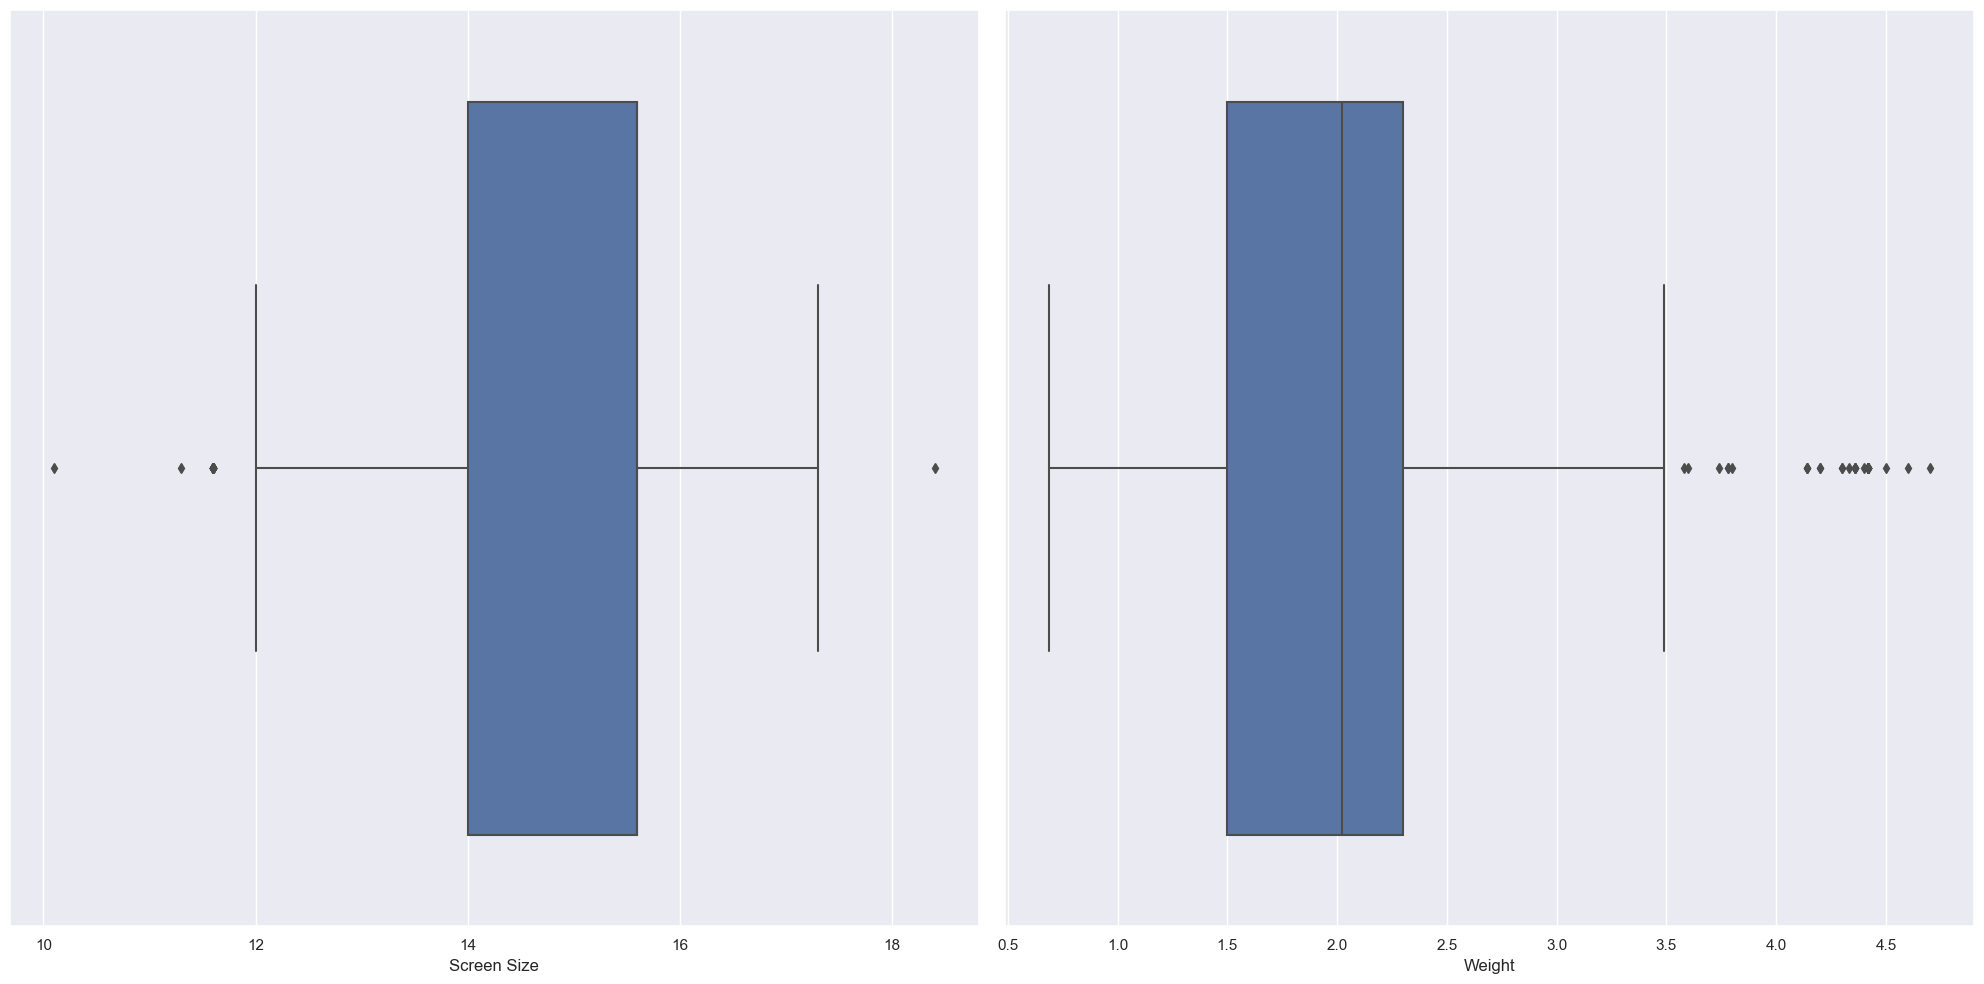

In [ ]:
num_vars = ['Screen Size', 'Weight']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df_train, ax=axs[i])

fig.tight_layout()

plt.show()

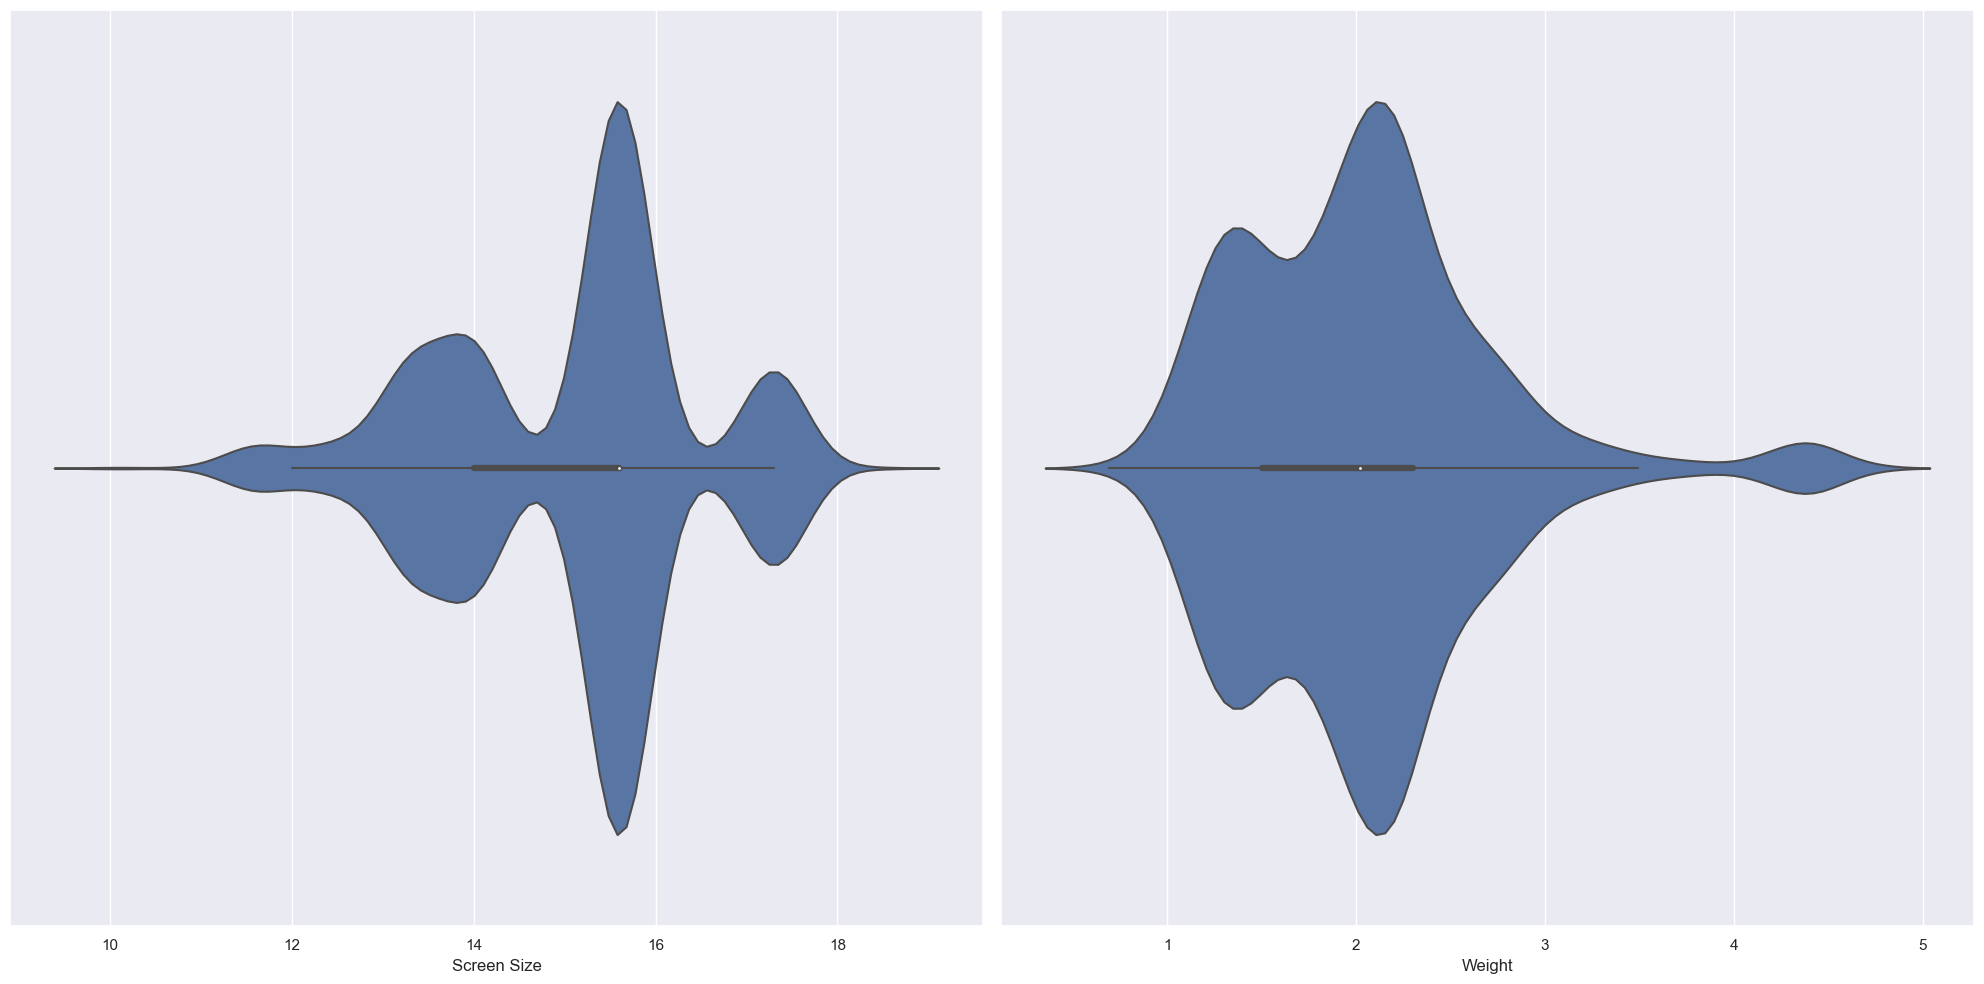

In [ ]:
num_vars = ['Screen Size', 'Weight']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df_train, ax=axs[i])

fig.tight_layout()

plt.show()

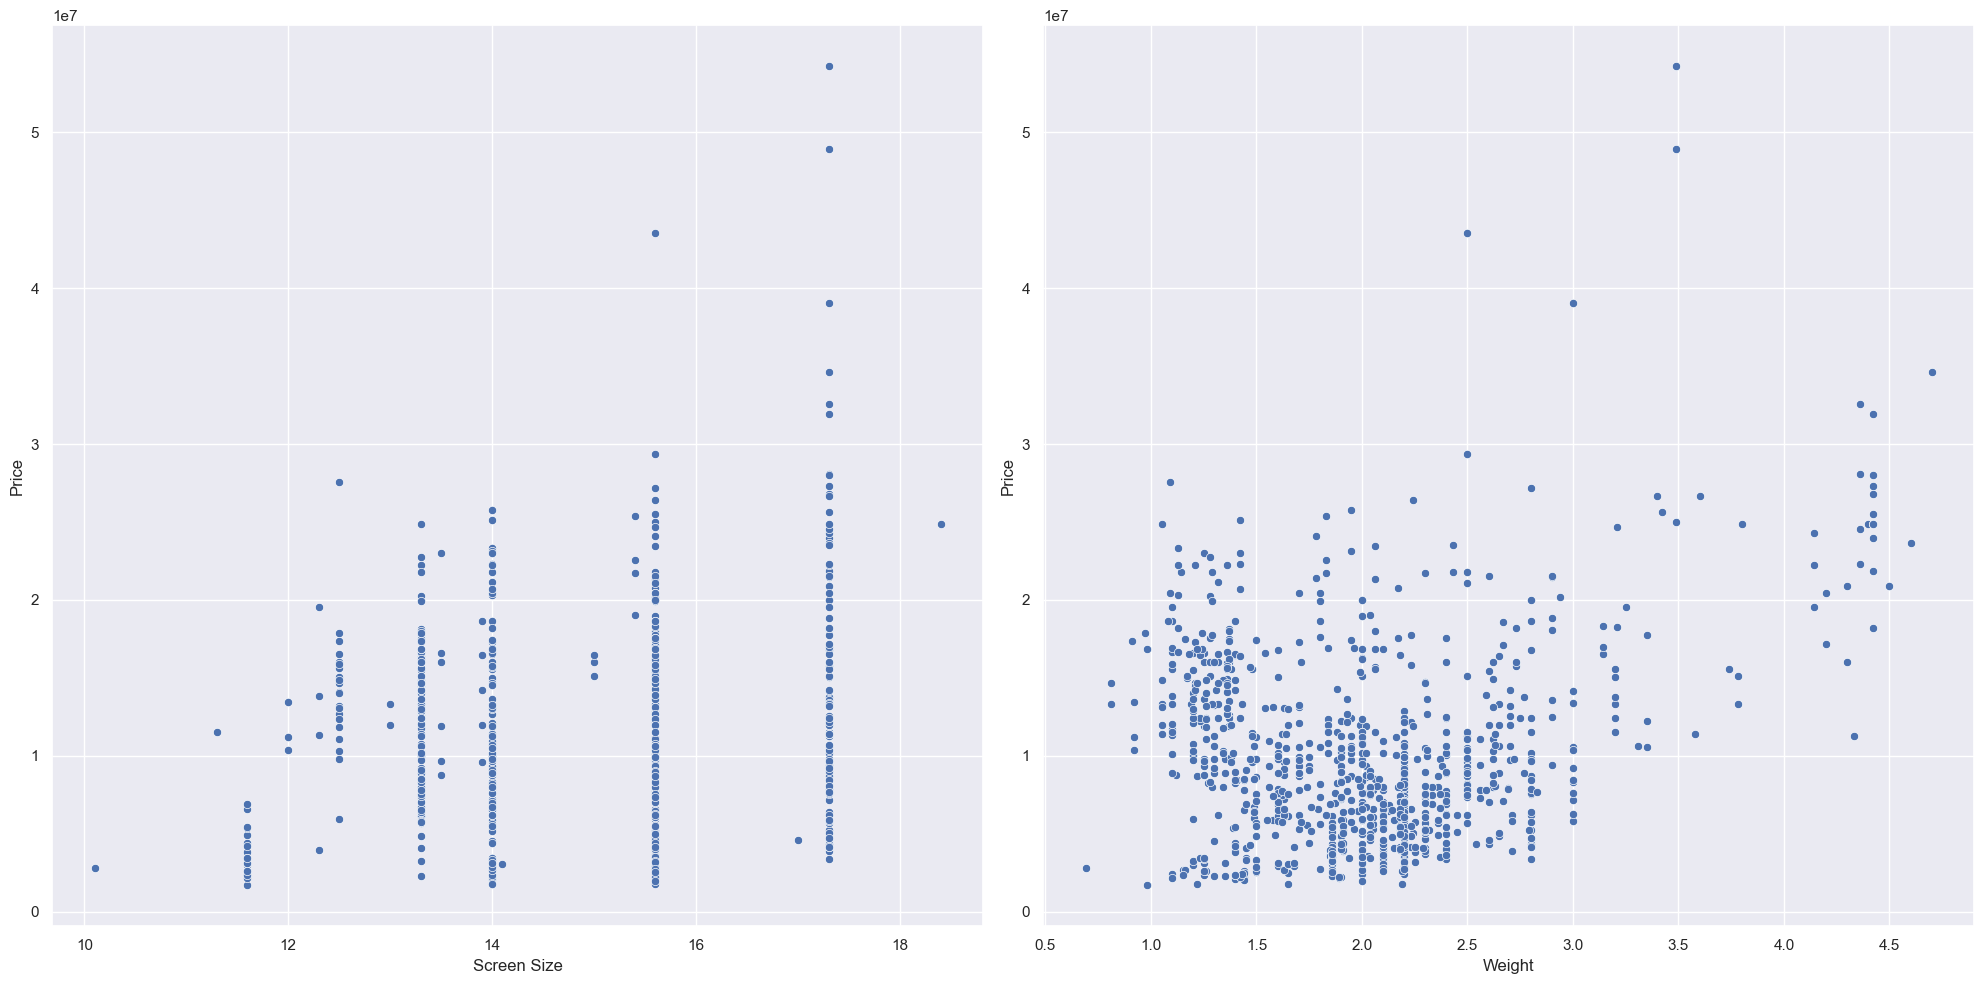

In [ ]:
num_vars = ['Screen Size', 'Weight']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', data=df_train, ax=axs[i])

fig.tight_layout()

plt.show()

# Data Preprocessing Part 2

In [ ]:
df_train.drop(columns=['Model Name', 'Screen', 'CPU', ' Storage', 'GPU'], inplace=True)
df_train.shape

(977, 12)

In [ ]:
df_train.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,Price,CPU brand,GPU brand,Screen Quality,Storage Type
0,Apple,Ultrabook,13.3,8GB,macOS,NaN,1.37,11912523.48,Intel Core i5,Intel,2560x1600,128GB SSD
1,Apple,Ultrabook,13.3,8GB,macOS,NaN,1.34,7993374.48,Intel Core i5,Intel,1440x900,Flash Storage
2,HP,Notebook,15.6,8GB,No OS,NaN,1.86,5112900.00,Intel Core i5,Intel,1920x1080,256GB SSD
3,Apple,Ultrabook,15.4,16GB,macOS,NaN,1.83,22563005.40,Intel Core i7,AMD,2880x1800,512GB SSD
4,Apple,Ultrabook,13.3,8GB,macOS,NaN,1.37,16037611.20,Intel Core i5,Intel,2560x1600,256GB SSD


In [ ]:
check_missing = df_train.isnull().sum() * 100 / df_train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Operating System Version    13.920164
dtype: float64

In [ ]:
df_train.fillna('Unknown', inplace=True)
df_train.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,Price,CPU brand,GPU brand,Screen Quality,Storage Type
0,Apple,Ultrabook,13.3,8GB,macOS,Unknown,1.37,11912523.48,Intel Core i5,Intel,2560x1600,128GB SSD
1,Apple,Ultrabook,13.3,8GB,macOS,Unknown,1.34,7993374.48,Intel Core i5,Intel,1440x900,Flash Storage
2,HP,Notebook,15.6,8GB,No OS,Unknown,1.86,5112900.00,Intel Core i5,Intel,1920x1080,256GB SSD
3,Apple,Ultrabook,15.4,16GB,macOS,Unknown,1.83,22563005.40,Intel Core i7,AMD,2880x1800,512GB SSD
4,Apple,Ultrabook,13.3,8GB,macOS,Unknown,1.37,16037611.20,Intel Core i5,Intel,2560x1600,256GB SSD


In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df_train.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df_train[col].unique()}")

Manufacturer: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Category: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
RAM: ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB']
Operating System: ['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']
Operating System Version: ['Unknown' '10' 'X' '10 S' '7']
CPU brand: ['Intel Core i5' 'Intel Core i7' 'AMD Processor' 'Intel Core i3'
 'Other Intel Processor']
GPU brand: ['Intel' 'AMD' 'Nvidia']
Screen Quality: ['2560x1600' '1440x900' '1920x1080' '2880x1800' '1366x768' '2304x1440'
 '3200x1800' '1920x1200' '2256x1504' ' 1366x768' '3840x2160' '2160x1440'
 '2560x1440' '1600x900' '2736x1824' '2400x1600']
Storage Type: ['128GB SSD' 'Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD' '1TB HDD'
 'Mixed Storage']


In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df_train.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df_train[col].unique())
    
    # Transform the column using the encoder
    df_train[col] = label_encoder.transform(df_train[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df_train[col].unique()}")

Manufacturer: [ 1  7  0  2  4 10  3 11 13 16  8 18 17 14 12 15  6  5  9]
Category: [4 3 2 1 0 5]
RAM: [7 1 5 3 0 6 4 2]
Operating System: [5 3 4 2 0 1]
Operating System Version: [3 0 4 1 2]
CPU brand: [2 3 0 1 4]
GPU brand: [1 0 2]
Screen Quality: [11  2  4 13  1  8 14  5  7  0 15  6 10  3 12  9]
Storage Type: [0 5 2 4 3 1 6]


In [ ]:
df_train.dtypes

Manufacturer                  int32
Category                      int32
Screen Size                 float64
RAM                           int32
Operating System              int32
Operating System Version      int32
Weight                      float64
Price                       float64
CPU brand                     int32
GPU brand                     int32
Screen Quality                int32
Storage Type                  int32
dtype: object

# Remove Outlier Using Z-Score

In [ ]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df_train, cols, threshold=3):
    # loop over each selected column
    for col in cols:
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df_train[col]))
        # remove rows with z-score greater than threshold in selected column
        df_train = df_train[(z < threshold) | (df_train[col].isnull())]
    return df_train

In [ ]:
selected_cols = ['Screen Size', 'Weight']
df_clean = remove_outliers(df_train, selected_cols)
df_clean.shape

(949, 12)

<AxesSubplot:>

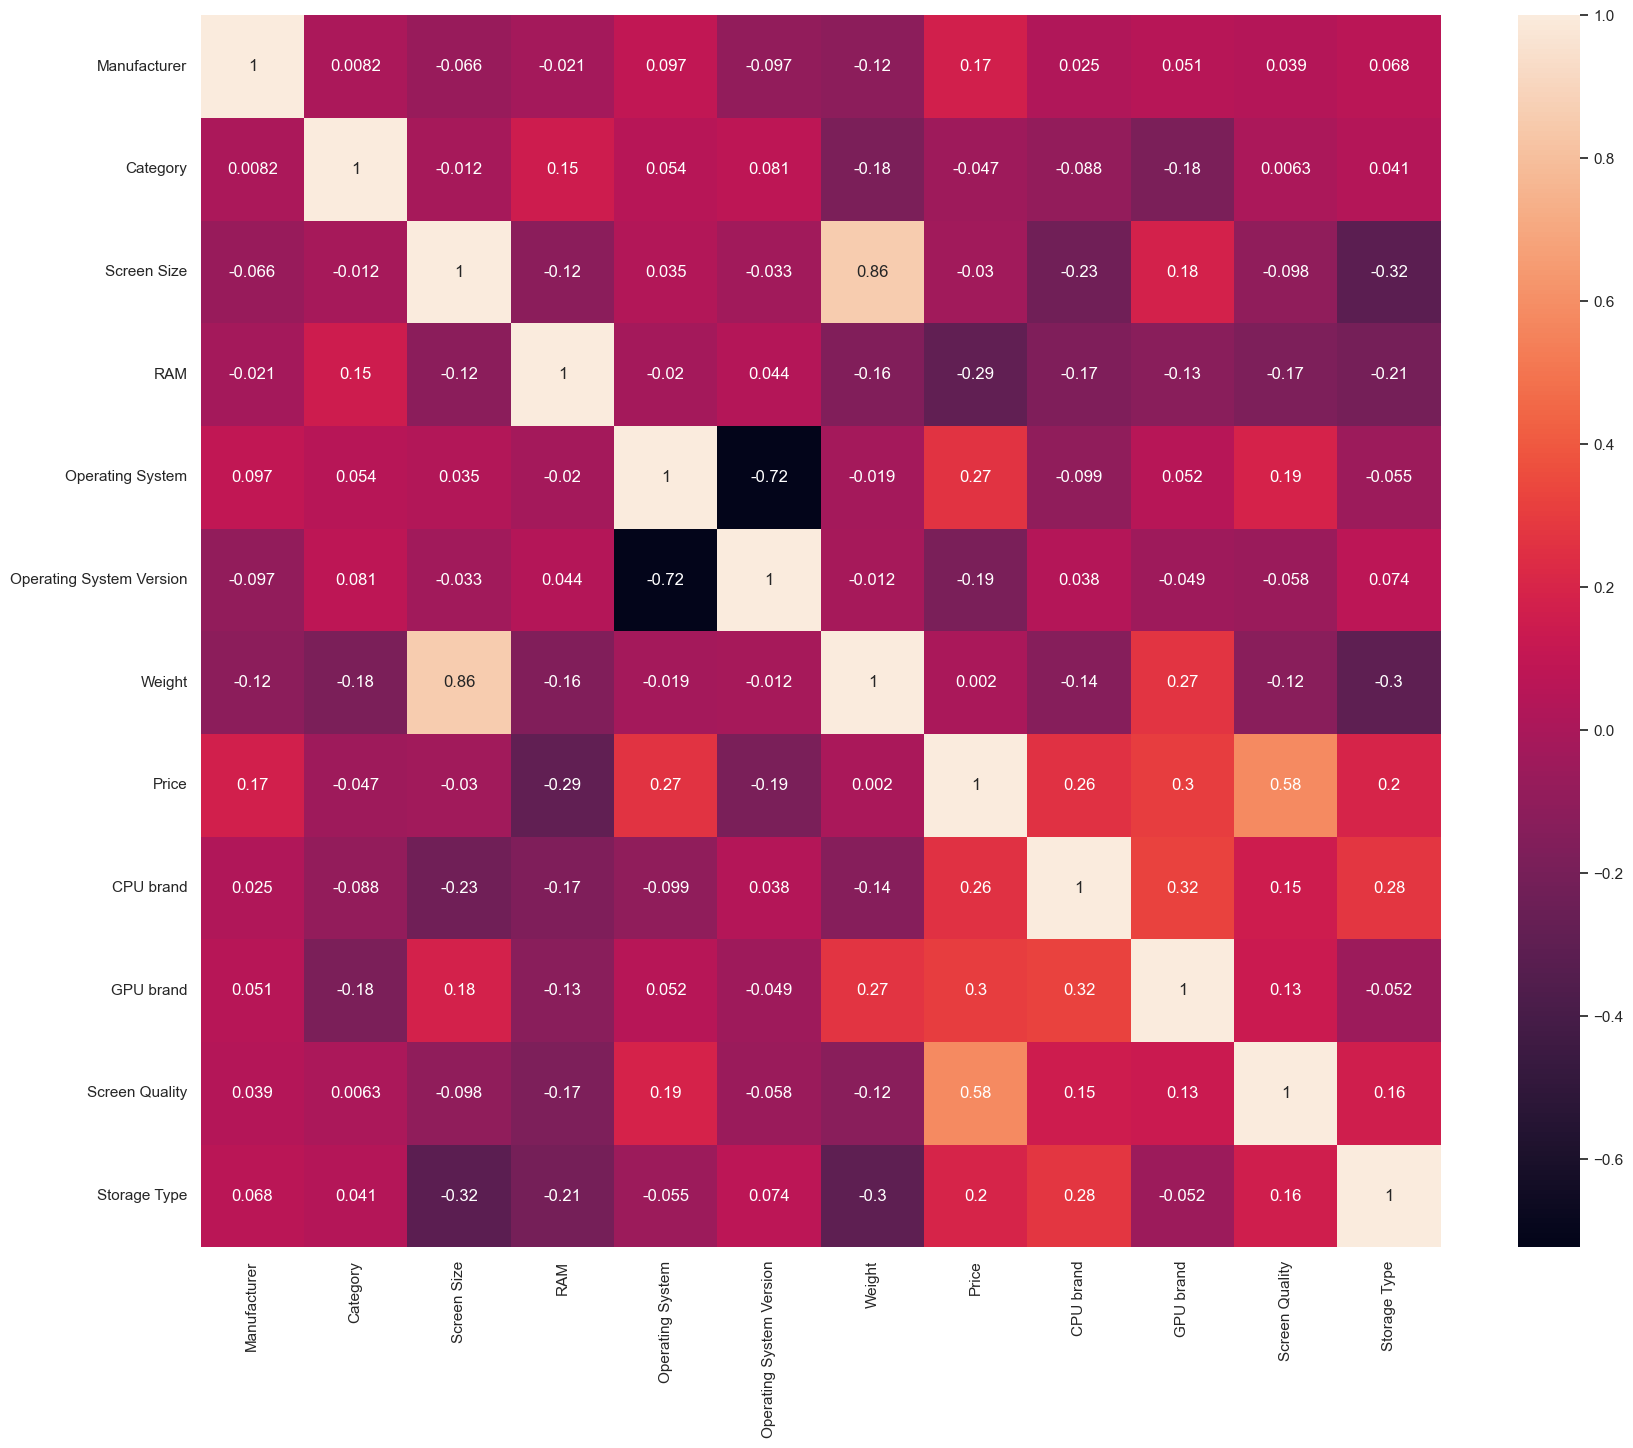

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(), fmt='.2g', annot=True)

# Machine Learning Model Building

In [ ]:
X = df_clean.drop('Price', axis=1)
y = df_clean['Price']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='sqrt', min_samples_leaf=3, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=3,
                      random_state=0)

In [ ]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 2444689.314149068
MSE is 20123812945266.836
R2 score is 0.40192836067995164
RMSE score is 4485957.305332591


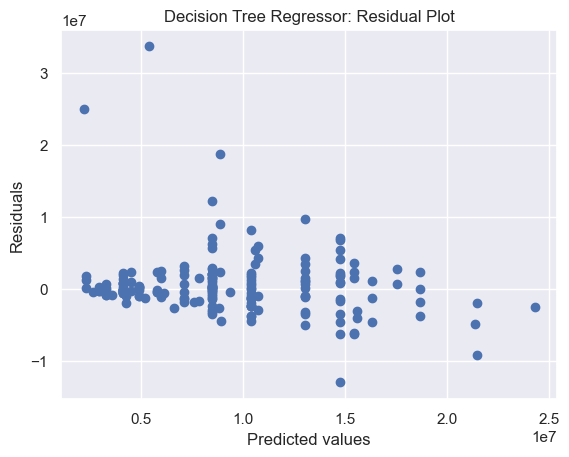

In [ ]:
residuals = y_test - y_pred

# Create a scatter plot of predicted values vs residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Decision Tree Regressor: Residual Plot")
plt.show()

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=9, min_samples_split=2, min_samples_leaf=1, 
                           max_features='sqrt', n_estimators=50)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', n_estimators=50,
                      random_state=0)

In [ ]:
from sklearn import metrics
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1793080.2404555941
MSE is 8385656403858.129
R2 score is 0.7507816592277715
RMSE score is 2895799.7865629676


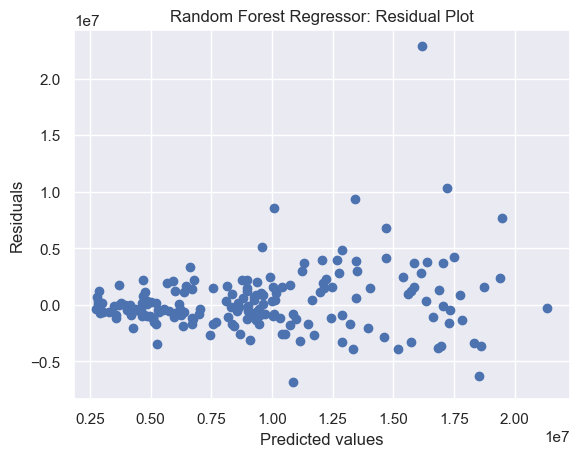

In [ ]:
residuals = y_test - y_pred

# Create a scatter plot of predicted values vs residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Random Forest Regressor: Residual Plot")
plt.show()

# Feature Importances

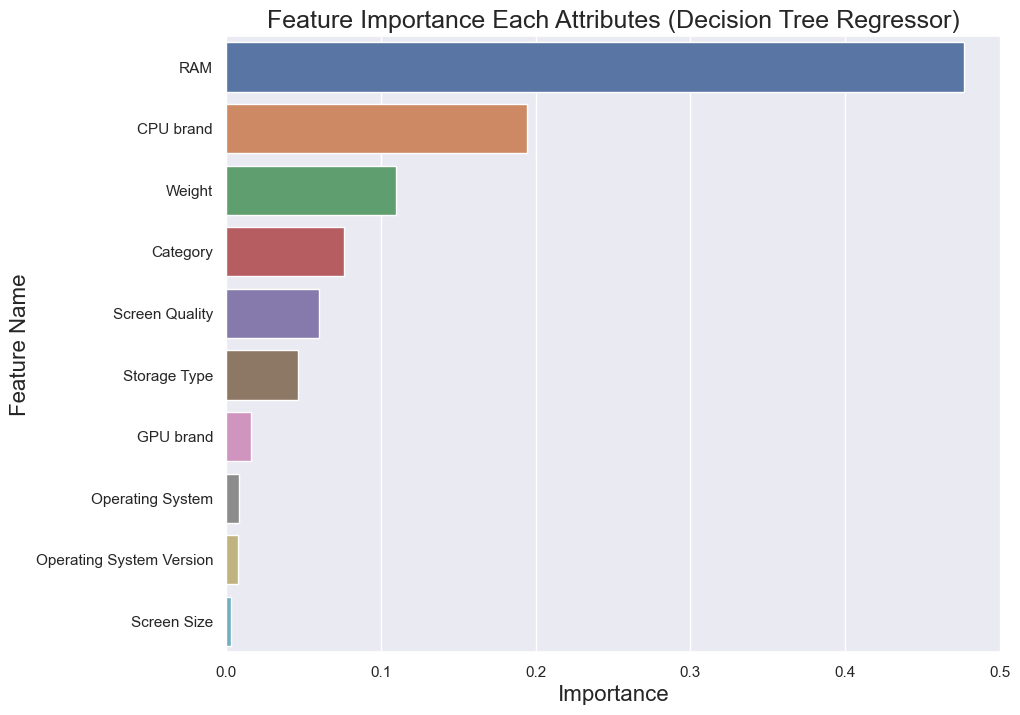

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

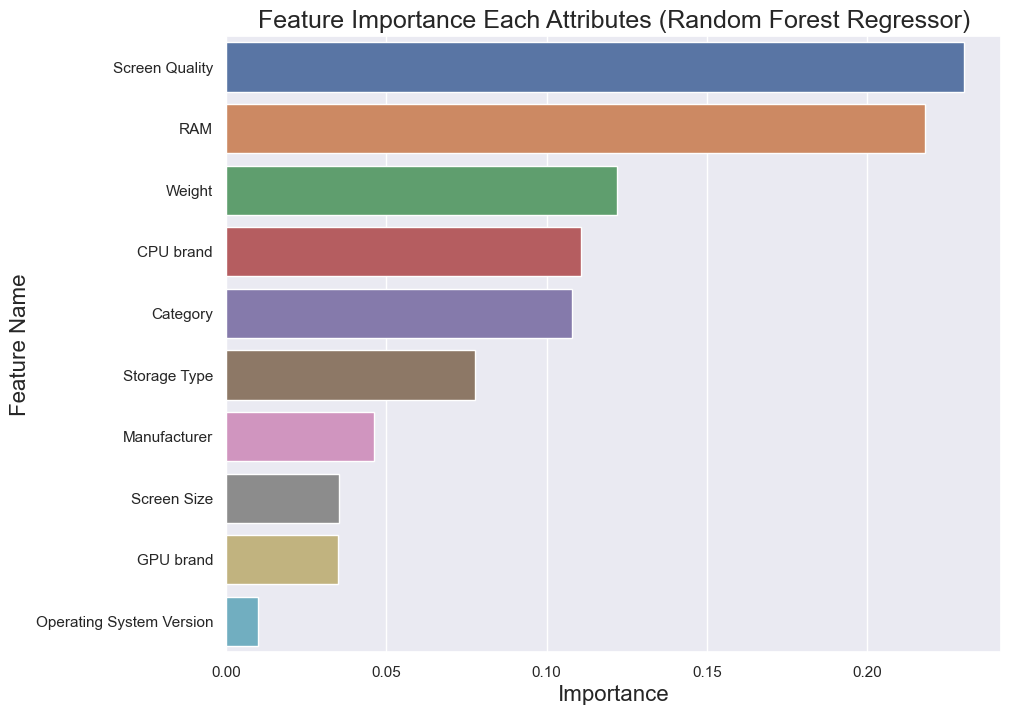

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rf.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Apply to test data

In [ ]:
df_test.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,Price,CPU brand,GPU brand,Screen Quality,Storage Type
0,HP,Notebook,15.6,6GB,Windows,10,2.04,5148468.0,Intel Core i7,Intel,1366x768,1TB HDD
1,Asus,Gaming,17.3,16GB,Windows,10,2.99,15552108.0,Intel Core i7,Nvidia,1920x1080,256GB SSD
2,Dell,2 in 1 Convertible,15.6,12GB,Windows,10,2.19,11550708.0,Intel Core i7,Intel,1920x1080,512GB SSD
3,Toshiba,Notebook,13.3,4GB,Windows,7,1.2,10625940.0,Intel Core i5,Intel,1920x1080,128GB SSD
4,Lenovo,Notebook,15.6,6GB,Windows,10,2.2,4881708.0,AMD Processor,AMD,1920x1080,256GB SSD


# Clean the dataset

In [ ]:
df_test['Weight'] = df_test['Weight'].str.strip('kg')
df_test['Screen Size'] = df_test['Screen Size'].str.strip('"')
df_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2,4881708.0


In [ ]:
df_test['CPU brand'] = df_test['CPU'].apply(fetch_processor)

<AxesSubplot:>

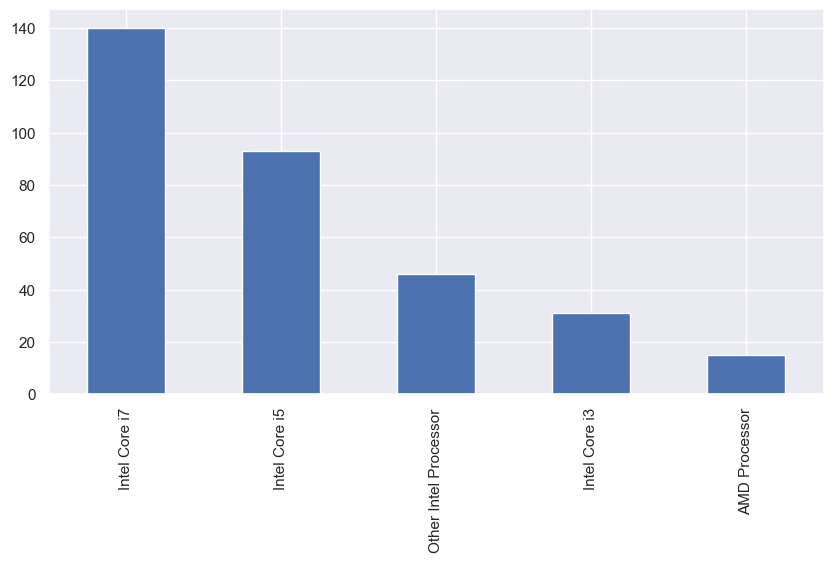

In [ ]:
plt.figure(figsize=(10,5))
df_test['CPU brand'].value_counts().plot(kind='bar')

In [ ]:
df_test['GPU brand'] = df_test['GPU'].apply(gpu_type)

<AxesSubplot:>

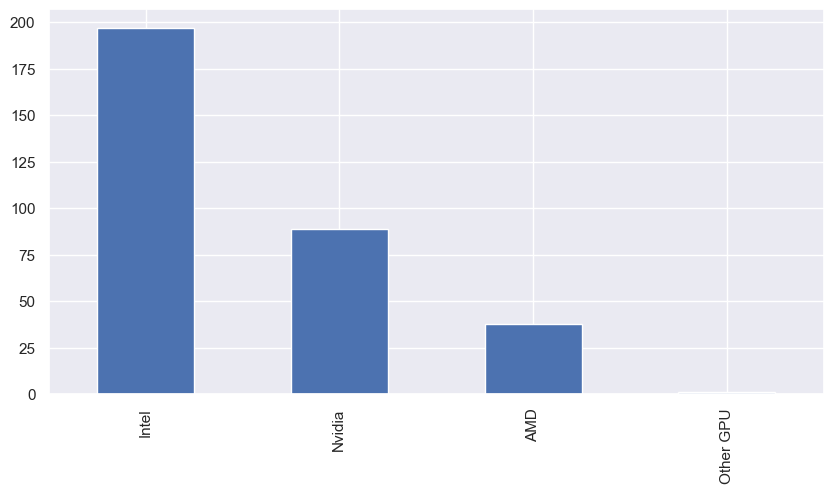

In [ ]:
plt.figure(figsize=(10,5))
df_test['GPU brand'].value_counts().plot(kind='bar')

In [ ]:
df_test['Operating System'] = df_test['Operating System'].replace('Mac OS', 'macOS')

In [ ]:
df_test['Screen Quality'] = df_test['Screen'].str.slice(-9)

<AxesSubplot:>

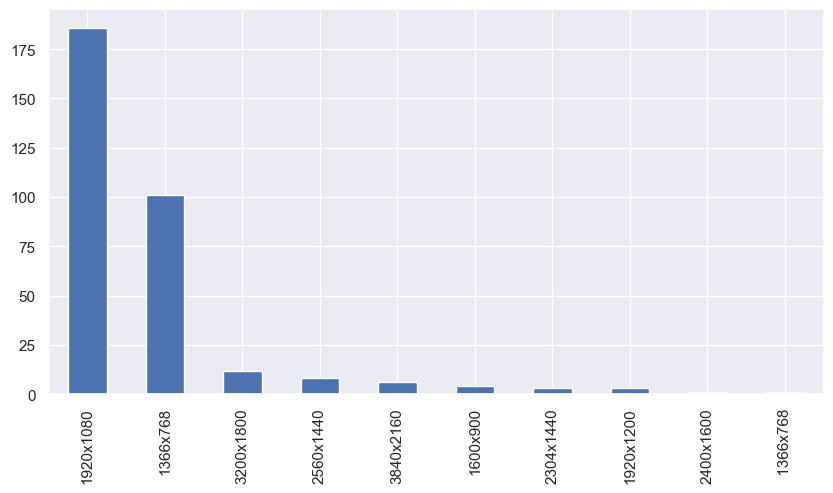

In [ ]:
plt.figure(figsize=(10,5))
df_test['Screen Quality'].value_counts().plot(kind='bar')

In [ ]:
df_test['Storage Type'] = df_test[' Storage'].apply(fetch_storage)

<AxesSubplot:>

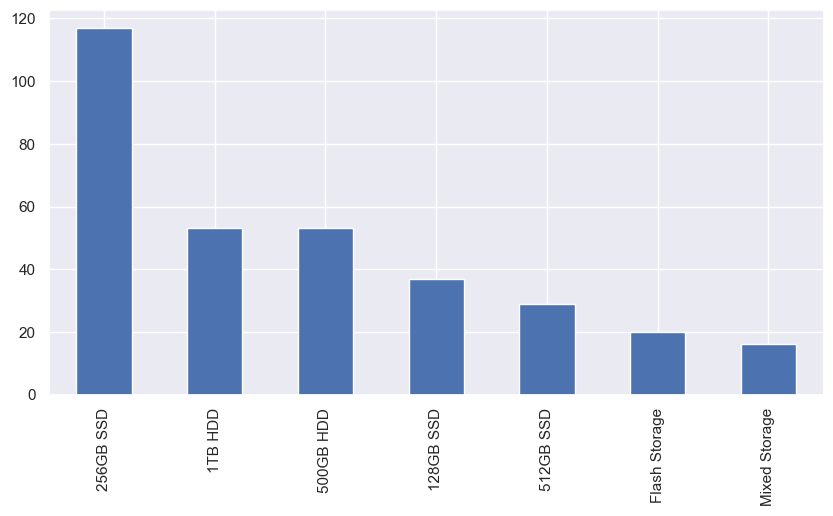

In [ ]:
plt.figure(figsize=(10,5))
df_test['Storage Type'].value_counts().plot(kind='bar')

In [ ]:
df_test.drop(columns=['Model Name', 'Screen', 'CPU', ' Storage', 'GPU', 'Price'], inplace=True)
df_test.shape

(325, 11)

In [ ]:
df_test.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,CPU brand,GPU brand,Screen Quality,Storage Type
0,HP,Notebook,15.6,6GB,Windows,10,2.04,Intel Core i7,Intel,1366x768,1TB HDD
1,Asus,Gaming,17.3,16GB,Windows,10,2.99,Intel Core i7,Nvidia,1920x1080,256GB SSD
2,Dell,2 in 1 Convertible,15.6,12GB,Windows,10,2.19,Intel Core i7,Intel,1920x1080,512GB SSD
3,Toshiba,Notebook,13.3,4GB,Windows,7,1.2,Intel Core i5,Intel,1920x1080,128GB SSD
4,Lenovo,Notebook,15.6,6GB,Windows,10,2.2,AMD Processor,AMD,1920x1080,256GB SSD


In [ ]:
check_missing = df_test.isnull().sum() * 100 / df_test.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Operating System Version    10.461538
dtype: float64

In [ ]:
df_test.fillna('Unknown', inplace=True)
df_test.head()

,Manufacturer,Category,Screen Size,RAM,Operating System,Operating System Version,Weight,CPU brand,GPU brand,Screen Quality,Storage Type
0,HP,Notebook,15.6,6GB,Windows,10,2.04,Intel Core i7,Intel,1366x768,1TB HDD
1,Asus,Gaming,17.3,16GB,Windows,10,2.99,Intel Core i7,Nvidia,1920x1080,256GB SSD
2,Dell,2 in 1 Convertible,15.6,12GB,Windows,10,2.19,Intel Core i7,Intel,1920x1080,512GB SSD
3,Toshiba,Notebook,13.3,4GB,Windows,7,1.2,Intel Core i5,Intel,1920x1080,128GB SSD
4,Lenovo,Notebook,15.6,6GB,Windows,10,2.2,AMD Processor,AMD,1920x1080,256GB SSD


In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df_test.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df_test[col].unique()}")

Manufacturer: ['HP' 'Asus' 'Dell' 'Toshiba' 'Lenovo' 'Fujitsu' 'Acer' 'MSI' 'Vero'
 'Apple' 'Razer' 'Samsung']
Category: ['Notebook' 'Gaming' '2 in 1 Convertible' 'Netbook' 'Ultrabook'
 'Workstation']
Screen Size: ['15.6' '17.3' '13.3' '14.0' '12.5' '11.6' '12.0' '10.1' '12.3' '15.0']
RAM: ['6GB' '16GB' '12GB' '4GB' '8GB' '2GB' '64GB' '32GB']
Operating System: ['Windows' 'No OS' 'Chrome OS' 'macOS' 'Linux' 'Android']
Operating System Version: ['10' '7' 'Unknown' 'X']
Weight: ['2.04' '2.99' '2.19' '1.2' '2.2' '2.3' '1.75' '2.25' '2.5' '2.36' '1.6'
 '0.97' '2.1' '1.9' '1.68' '1.4' '1.11' '2.4' '1.48' '2.7' '1.34' '2.18'
 '1.64' '1.95' '1.43' '2.65' '1.26' '1.54' '1.49' '1.5' '1.47' '2.08'
 '2.09' '2.31' '1.29' '2.63' '1.84' '1.8' '1.45' '3.78' '4.6' '1.1' '1.91'
 '1.96' '2.94' '4kgs' '2.32' '3.58' '1.62' '3.21' '0.920' '2.06' '1.3'
 '3.0' '0.99' '0.69' '1.7' '1.86' '2.6' '4.3' '2.20' '2.9' '2.59' '1.16'
 '2.24' '1.23' '1.25' '1.05' '3.52' '1.35' '2' '3.35' '2.23' '3' '1.88'
 '2.8' '2.0' 

In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df_test.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df_test[col].unique())
    
    # Transform the column using the encoder
    df_test[col] = label_encoder.transform(df_test[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df_test[col].unique()}")

Manufacturer: [ 5  2  3 10  6  4  0  7 11  1  8  9]
Category: [3 1 0 2 4 5]
Screen Size: [8 9 5 6 4 1 2 0 3 7]
RAM: [6 1 0 4 7 2 5 3]
Operating System: [4 3 1 5 2 0]
Operating System Version: [0 1 2 3]
Weight: [48 83 55 11 57 64 36 62 71 68 31  2 53 41 34 22  7 69 27 78 19 54 33 43
 23 77 15 30 28 29 26 51 52 65 17 76 38 37 25 92 96  6 42 44 82 97 66 91
 32 86  1 49 18 85  3  0 35 39 74 95 58 81 72  9 61 12 14  4 90 20 46 89
 60 84 40 80 47 16 75 24 88 50 21 45 73 94  8 59 70 87 56  5 79 67 13 93
 63 10]
CPU brand: [3 2 0 4 1]
GPU brand: [1 2 0 3]
Screen Quality: [1 3 8 9 7 5 2 4 6 0]
Storage Type: [1 2 4 0 3 6 5]


# Price Prediction on Test Data

In [ ]:
y_pred_prob = rf.predict(df_test)
y_pred_prob_df = pd.DataFrame(data=y_pred_prob)
y_pred_prob_df

,0
0,1.017083e+07
1,1.816417e+07
2,1.525976e+07
3,1.115195e+07
4,8.753766e+06
...,...
320,1.259521e+07
321,2.251887e+07
322,9.424574e+06
323,1.017455e+07
